## Importamos las librerias que vamos a utilizar

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [212]:
# Transformamos los datasets en dataframes
calendar = pd.read_csv('./Datasets/Calendar_nvo.csv')
listings = pd.read_csv('./Datasets/Listings_nvo.csv')
reviews = pd.read_csv('./Datasets/Reviews_nvo.csv')

In [213]:
def plot_null_values(df):
    # Contar valores nulos y no nulos por columna
    null_counts = df.isnull().sum()
    non_null_counts = df.notnull().sum()

    # Calcular los porcentajes
    total_counts = null_counts + non_null_counts
    null_percentage = (null_counts / total_counts) * 100
    non_null_percentage = (non_null_counts / total_counts) * 100

    # Configurar el tamaño del gráfico
    fig, ax = plt.subplots(figsize=(6, 4))

    # Crear las barras apiladas
    bars1 = ax.barh(df.columns, null_percentage, color='lightcoral', edgecolor='grey', label='Nulos')
    bars2 = ax.barh(df.columns, non_null_percentage, left=null_percentage, color='lightgreen', edgecolor='grey', label='No Nulos')

    # Añadir etiquetas y título
    ax.set_xlabel('Porcentaje')
    ax.set_title(f'Porcentaje de valores nulos y no nulos por columna')
    ax.legend()

    # Mostrar el gráfico
    plt.show()

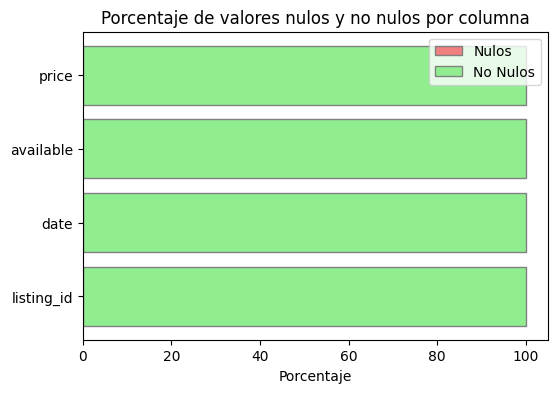

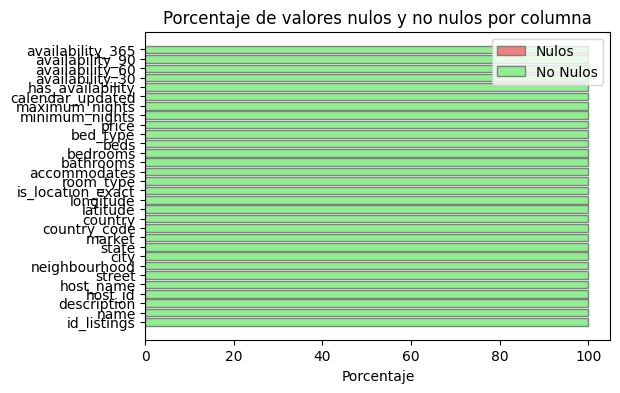

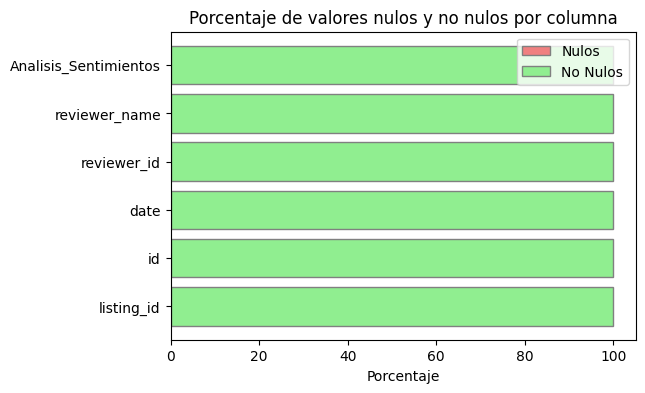

In [214]:
# Usamos la funcion para mostrar los graficos
plot_null_values(calendar)
plot_null_values(listings)
plot_null_values(reviews)

------------------------

#### Calendar

In [221]:
# Asegúrate de que la columna 'date' esté en formato datetime
calendar['date'] = pd.to_datetime(calendar['date'], errors='coerce')

# Extrae el año y crea una nueva columna 'year'
calendar['year'] = calendar['date'].dt.year

In [222]:
calendar.head()

,listing_id,date,available,price,year
0,50778,2020-04-26,no disponible,"$2,655.00",2020
1,133654,2020-04-27,disponible,"$1,150.00",2020
2,133654,2020-04-28,disponible,"$1,150.00",2020
3,133654,2020-04-29,disponible,"$1,150.00",2020
4,133654,2020-04-30,disponible,"$1,150.00",2020


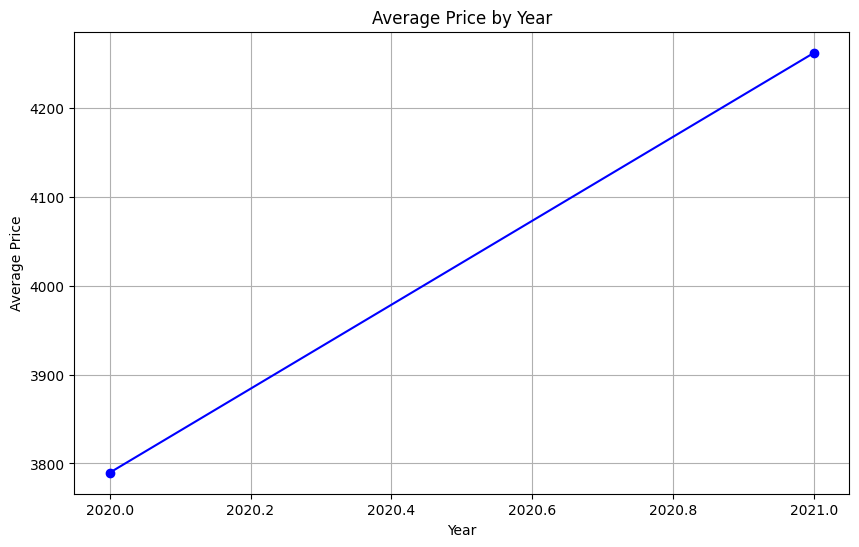

In [223]:
# Convertir la columna 'price' a formato numérico
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

# Agrupar por 'year' y calcular el precio promedio
price_by_year = calendar.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(price_by_year['year'], price_by_year['price'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price by Year')
plt.grid(True)
plt.show()

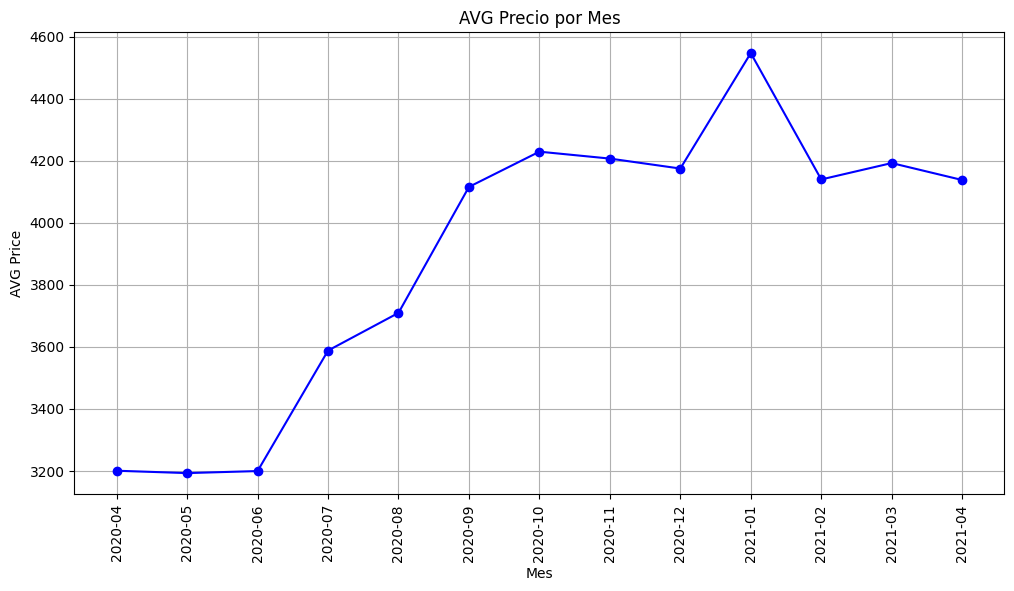

In [230]:
calendar['date'] = pd.to_datetime(calendar['date'], errors='coerce')

# Extraer el mes y año para agregar a la columna 'year'
calendar['month'] = calendar['date'].dt.to_period('M')

# Agrupar por 'month' y calcular el precio promedio
price_by_month = calendar.groupby('month')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(price_by_month['month'].astype(str), price_by_month['price'], marker='o', linestyle='-', color='blue')
plt.xlabel('Mes')
plt.ylabel('AVG Price')
plt.title('AVG Precio por Mes')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

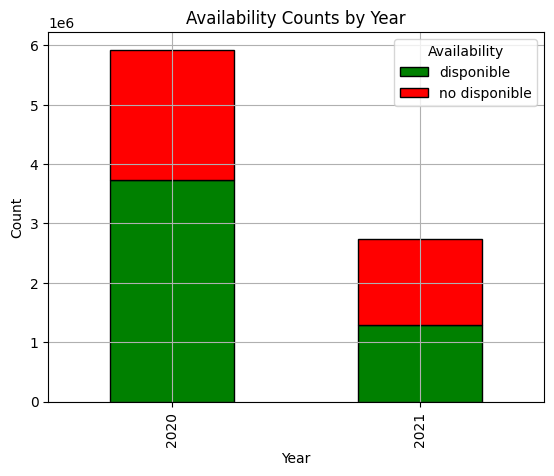

In [231]:
availability_counts = calendar.groupby(['year', 'available']).size().unstack()

plt.figure(figsize=(10, 6))
availability_counts.plot(kind='bar', stacked=True, color=['green', 'red'], edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Availability Counts by Year')
plt.legend(title='Availability')
plt.grid(True)
plt.show()

------------------------------------

In [232]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,Analisis_Sentimientos
0,11508,1615861,02-07-2012,877808,Charlie,2
1,11508,3157005,26-12-2012,656077,Shaily,2
2,11508,3281011,05-01-2013,2835998,Michiel,2
3,11508,6050019,28-07-2013,4600436,Tara,2
4,11508,9328455,22-12-2013,3130017,Simon,2


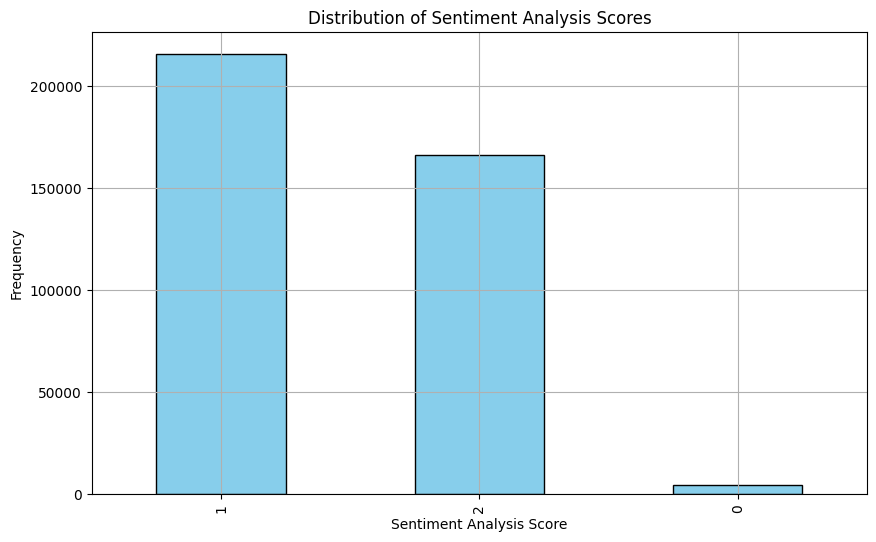

In [233]:
plt.figure(figsize=(10, 6))
reviews['Analisis_Sentimientos'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Analysis Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Analysis Scores')
plt.grid(True)
plt.show()

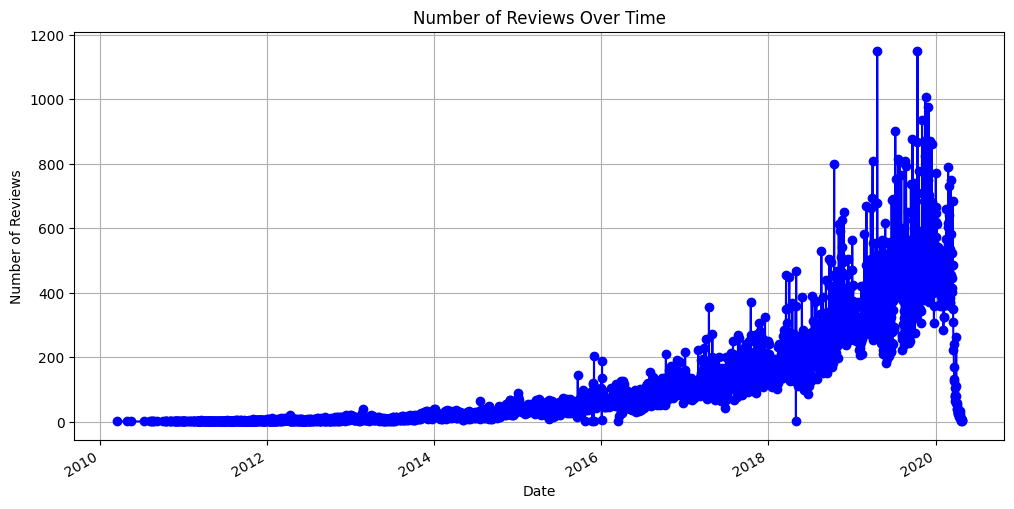

In [234]:
reviews['date'] = pd.to_datetime(reviews['date'], format='%d-%m-%Y', errors='coerce')

# Contar el número de reseñas por fecha
reviews_per_date = reviews.groupby('date').size()

plt.figure(figsize=(12, 6))
reviews_per_date.plot(kind='line', marker='o', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Over Time')
plt.grid(True)
plt.show()

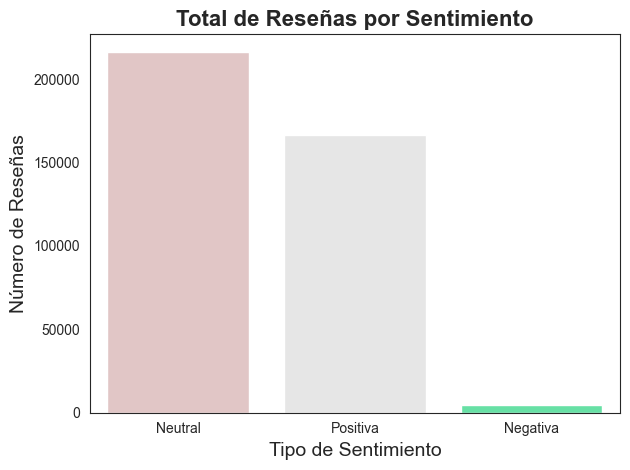

In [240]:
# Contar la cantidad de reseñas para cada tipo de sentimiento
sentiment_counts = reviews['Analisis_Sentimientos'].value_counts()

totals_df = pd.DataFrame({'Sentimiento': sentiment_counts.index, 'Total': sentiment_counts.values})

rename_dict = {
    0: 'Negativa',  
    1: 'Neutral',  
    2: 'Positiva'
}
totals_df['Sentimiento'] = totals_df['Sentimiento'].replace(rename_dict)


sns.set_style("white")
colors = ['#E6C1C1', '#E6E6E6', '#53F4A5'] 
sns.barplot(x='Sentimiento', y='Total', data=totals_df, palette=colors)
plt.title('Total de Reseñas por Sentimiento', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Sentimiento', fontsize=14)
plt.ylabel('Número de Reseñas', fontsize=14)
plt.tight_layout()
plt.show()

------------------------------------

In [268]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21984 entries, 0 to 21983
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_listings        21984 non-null  int64  
 1   name               21984 non-null  object 
 2   description        21984 non-null  object 
 3   host_id            21984 non-null  int64  
 4   host_name          21984 non-null  object 
 5   street             21984 non-null  object 
 6   neighbourhood      21984 non-null  object 
 7   city               21984 non-null  object 
 8   state              21984 non-null  object 
 9   market             21984 non-null  object 
 10  country_code       21984 non-null  object 
 11  country            21984 non-null  object 
 12  latitude           21984 non-null  float64
 13  longitude          21984 non-null  float64
 14  is_location_exact  21984 non-null  object 
 15  room_type          21984 non-null  object 
 16  accommodates       219

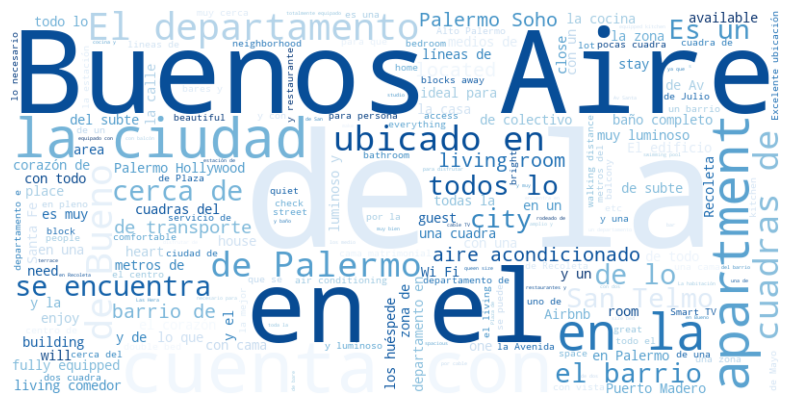

In [269]:
nube = listings[['description', 'name']]

# Combina los textos de ambas columnas en una sola cadena
texto = ' '.join(nube.fillna('').astype(str).values.flatten())

# Genera la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(texto)

# Mostrar la nube de palabras 
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

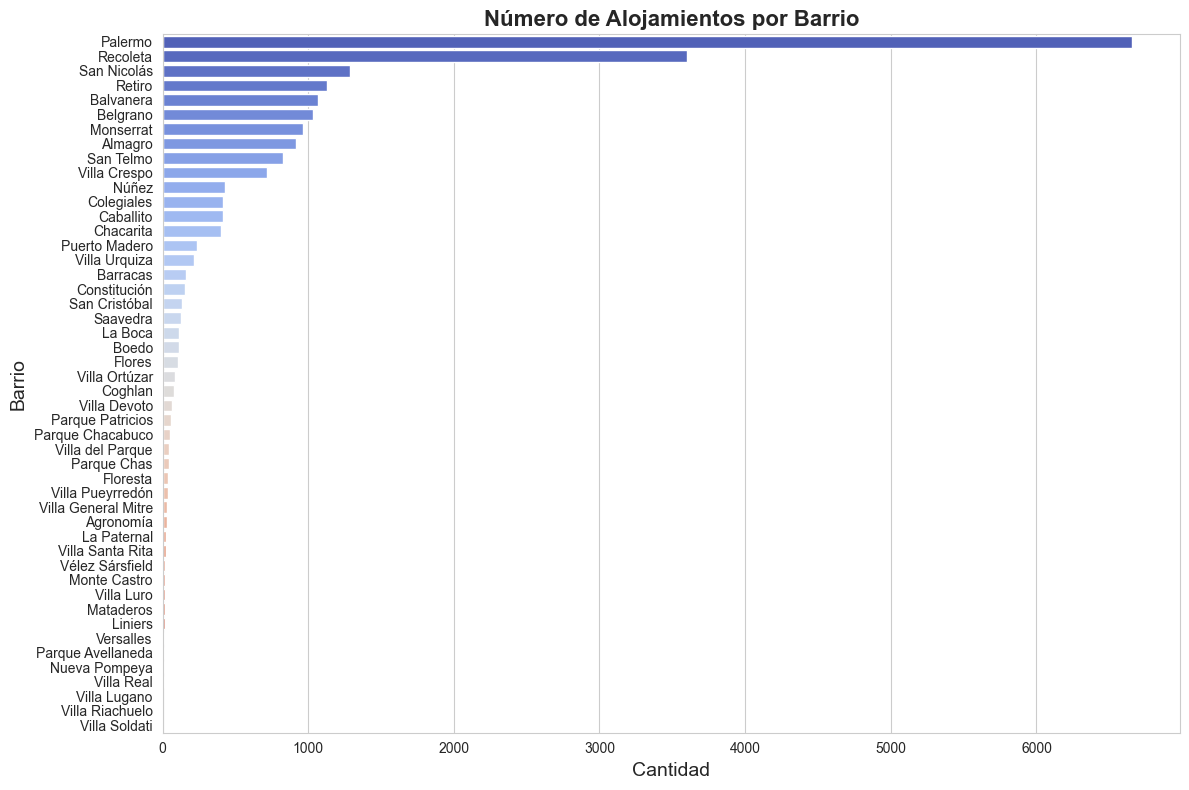

In [249]:
# Contar la cantidad de alojamientos para cada barrio
neighbourhood_counts = listings['neighbourhood'].value_counts()
neighbourhood_df = pd.DataFrame({'Barrio': neighbourhood_counts.index, 'Cantidad': neighbourhood_counts.values})

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='Cantidad', y='Barrio', data=neighbourhood_df, palette='coolwarm')
plt.title('Número de Alojamientos por Barrio', fontsize=16, fontweight='bold')
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Barrio', fontsize=14)
plt.tight_layout()
plt.show()

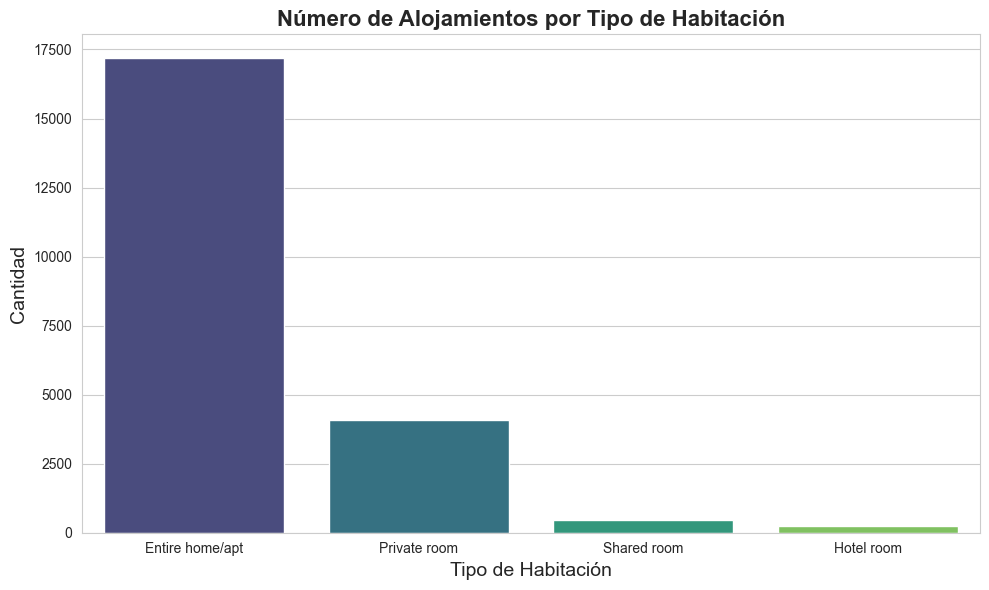

In [243]:
# Contar la cantidad de alojamientos para cada tipo de habitación
room_type_counts = listings['room_type'].value_counts()
room_type_df = pd.DataFrame({'Tipo de Habitación': room_type_counts.index, 'Cantidad': room_type_counts.values})

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Tipo de Habitación', y='Cantidad', data=room_type_df, palette='viridis')
plt.title('Número de Alojamientos por Tipo de Habitación', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Habitación', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.tight_layout()
plt.show()

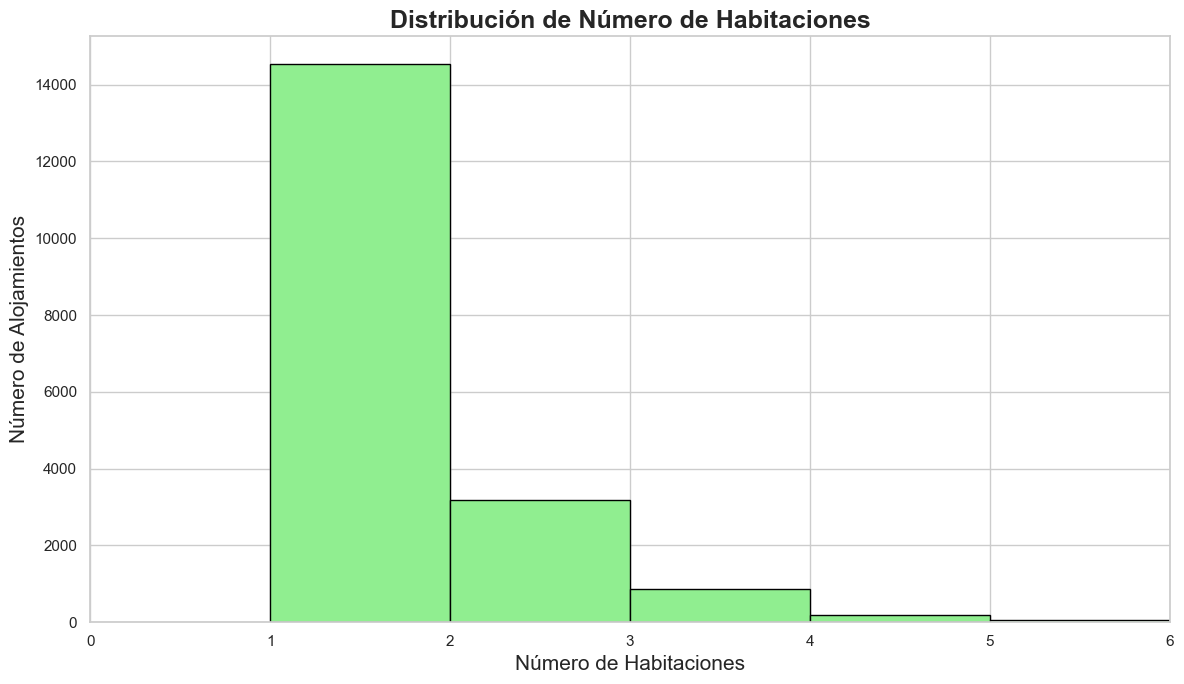

In [266]:
# Crear el histograma para la columna 'bedrooms'
plt.figure(figsize=(12, 7))
plt.hist(listings['bedrooms'].dropna(), bins=range(1, int(listings['bedrooms'].max()) + 2), color='lightgreen', edgecolor='black')


plt.xlim(0, 6) 
plt.title('Distribución de Número de Habitaciones', fontsize=18, fontweight='bold')
plt.xlabel('Número de Habitaciones', fontsize=15)
plt.ylabel('Número de Alojamientos', fontsize=15)
plt.tight_layout()
plt.show()

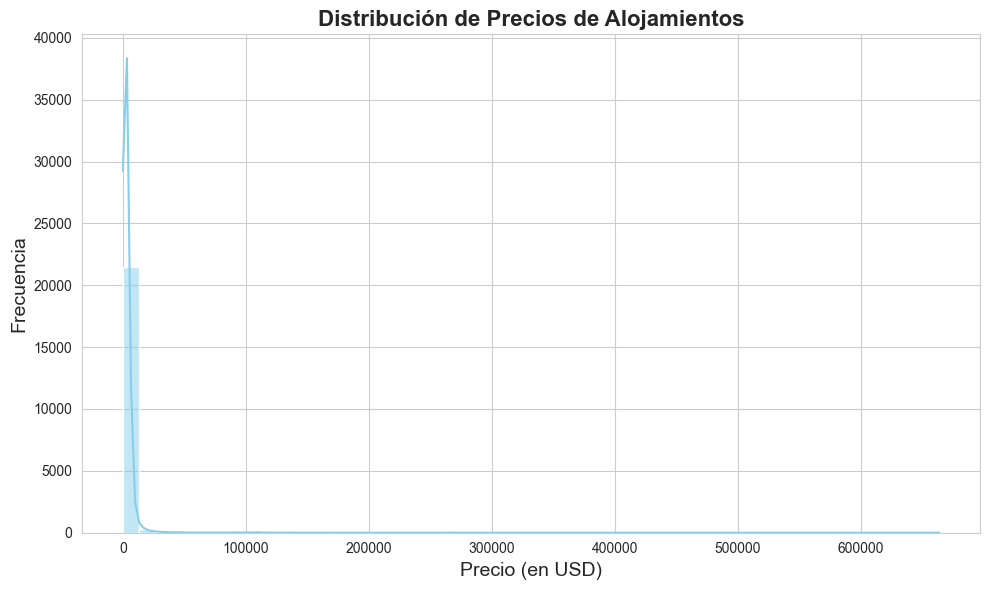

In [244]:
# Convertir la columna 'price' a numérica (quitar el signo $ y las comas)
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

# Establecer el estilo del gráfico
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(listings['price'], bins=50, color='skyblue', kde=True)
plt.title('Distribución de Precios de Alojamientos', fontsize=16, fontweight='bold')
plt.xlabel('Precio (en USD)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.tight_layout()
plt.show()


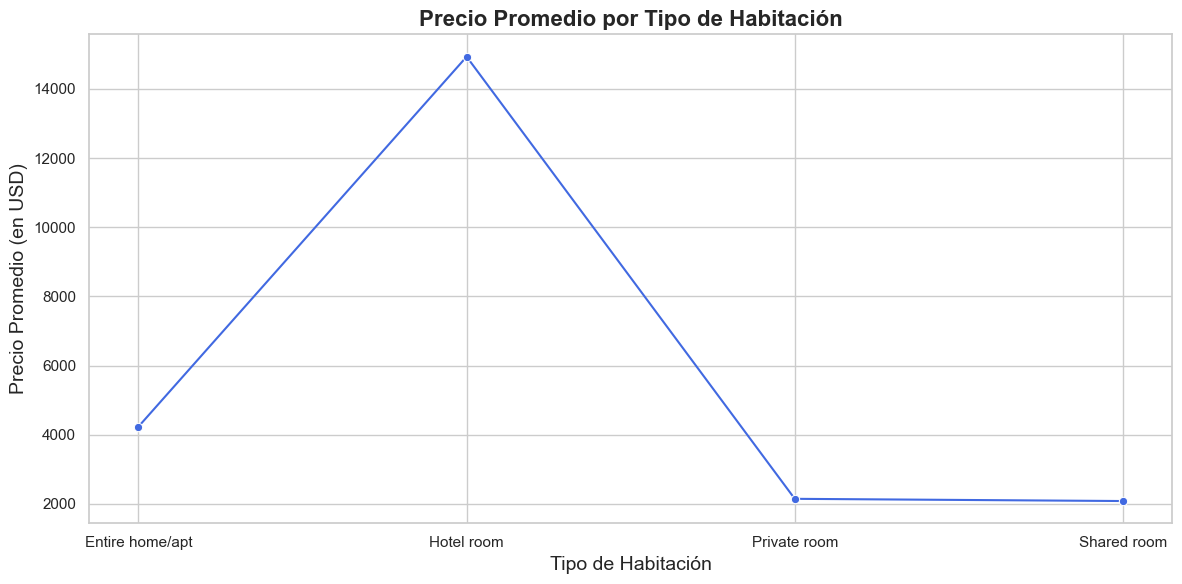

In [261]:
# Agrupar los datos por 'room_type' y calcular el precio medio
room_type_avg_price = listings.groupby('room_type')['price'].mean().reset_index()

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='room_type', y='price', data=room_type_avg_price, marker='o', color='royalblue')
plt.title('Precio Promedio por Tipo de Habitación', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Habitación', fontsize=14)
plt.ylabel('Precio Promedio (en USD)', fontsize=14)
plt.tight_layout()
plt.show()

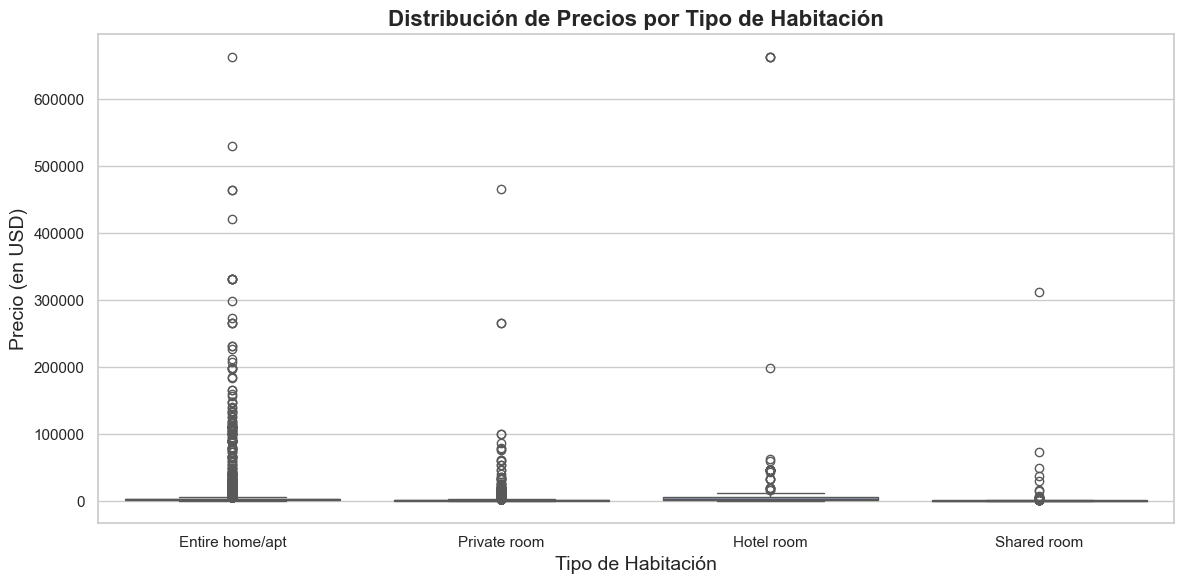

In [263]:
# Establecer el estilo del gráfico
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=listings, palette='Set2')
plt.title('Distribución de Precios por Tipo de Habitación', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Habitación', fontsize=14)
plt.ylabel('Precio (en USD)', fontsize=14)
plt.tight_layout()
plt.show()

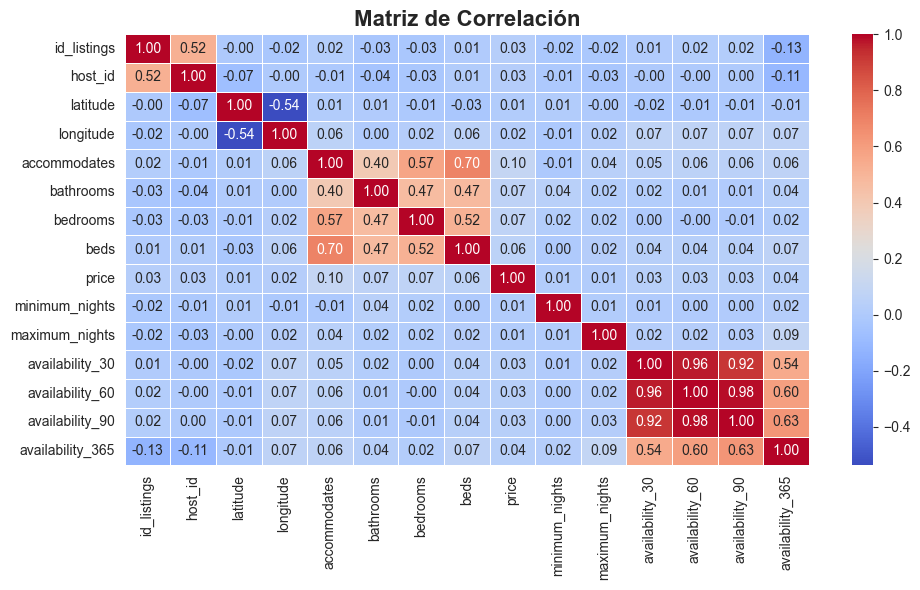

In [248]:
# Selecciona solo las columnas numéricas
numeric_df = listings.select_dtypes(include=[np.number])

# Calcula la matriz de correlación
corr = numeric_df.corr()

# Define el tamaño de la figura
figsize = (10, 6)

# Crea el gráfico de la matriz de correlación
plt.figure(figsize=figsize)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Agrega el título
plt.title('Matriz de Correlación', fontsize=16, fontweight='bold')

# Muestra el gráfico
plt.tight_layout()
plt.show()